In [1]:
from qutip import *
from qutip.operators import *
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
Ec = 1e8
Ej = 1e7
N_states = 50
ng_steps = 300

#

def projector(N,n,m):
    # |m><n| operator
    a = np.zeros((N,N),dtype = np.float64)
    if(n >= N or n < 0 or m >= N or m < 0):
        return Qobj(a)
    a[n,m] = 1
    return Qobj(a)
#
def projector_pm(N,n,m):
    a = np.zeros((2*N+1,2*N+1),dtype = np.float64)
    if(n > N or n < -N or m > N or m < -N):
        return Qobj(a)
    a[N+n,N+m] = 1
    return Qobj(a)

#
def num_pm(N):
    return num(2*N+1, offset = -N)    
def zero_pm(N):
    return zero_oper(2*N+1)

In [3]:
N_s = 4
Hj = zero_oper(N_s)
for n in range(0,N_s):
    Hj = Hj +(projector(N_s,n,n+1) + projector(N_s,n+1,n))


In [56]:
Ec = 1e8
Ej = 1e7
n = num_pm(N_states)
ng = 0
Hc = Ec*(n-ng)**2

eigs = np.zeros((ng_steps,2*N_states+1), dtype=np.float)
ng_space = np.linspace(-3,3,ng_steps)
Hj = zero_pm(N_states)
for n in range(-N_states,N_states+1):
    Hj = Hj - 0.5*Ej*(projector_pm(N_states,n,n+1) + projector_pm(N_states,n+1,n))
H = Hj + Hc
#print(Hj)
#print(Hc)
n = num_pm(N_states)
for ng_id, ng in enumerate(ng_space):
    Hc = Ec*(n-ng)**2
    H = Hc + Hj
    eigs[ng_id,:] = H.eigenenergies()

Hc = Ec*(n)**2
H = Hc + Hj
waves = H.eigenstates()[1] #0 is for eigenvalues
#for x_id, x in enumerate(waves[0]):
#    print(str(x_id) + ' ' + str(x[0][0]))
#print(waves[0][N_states][0][0])

/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


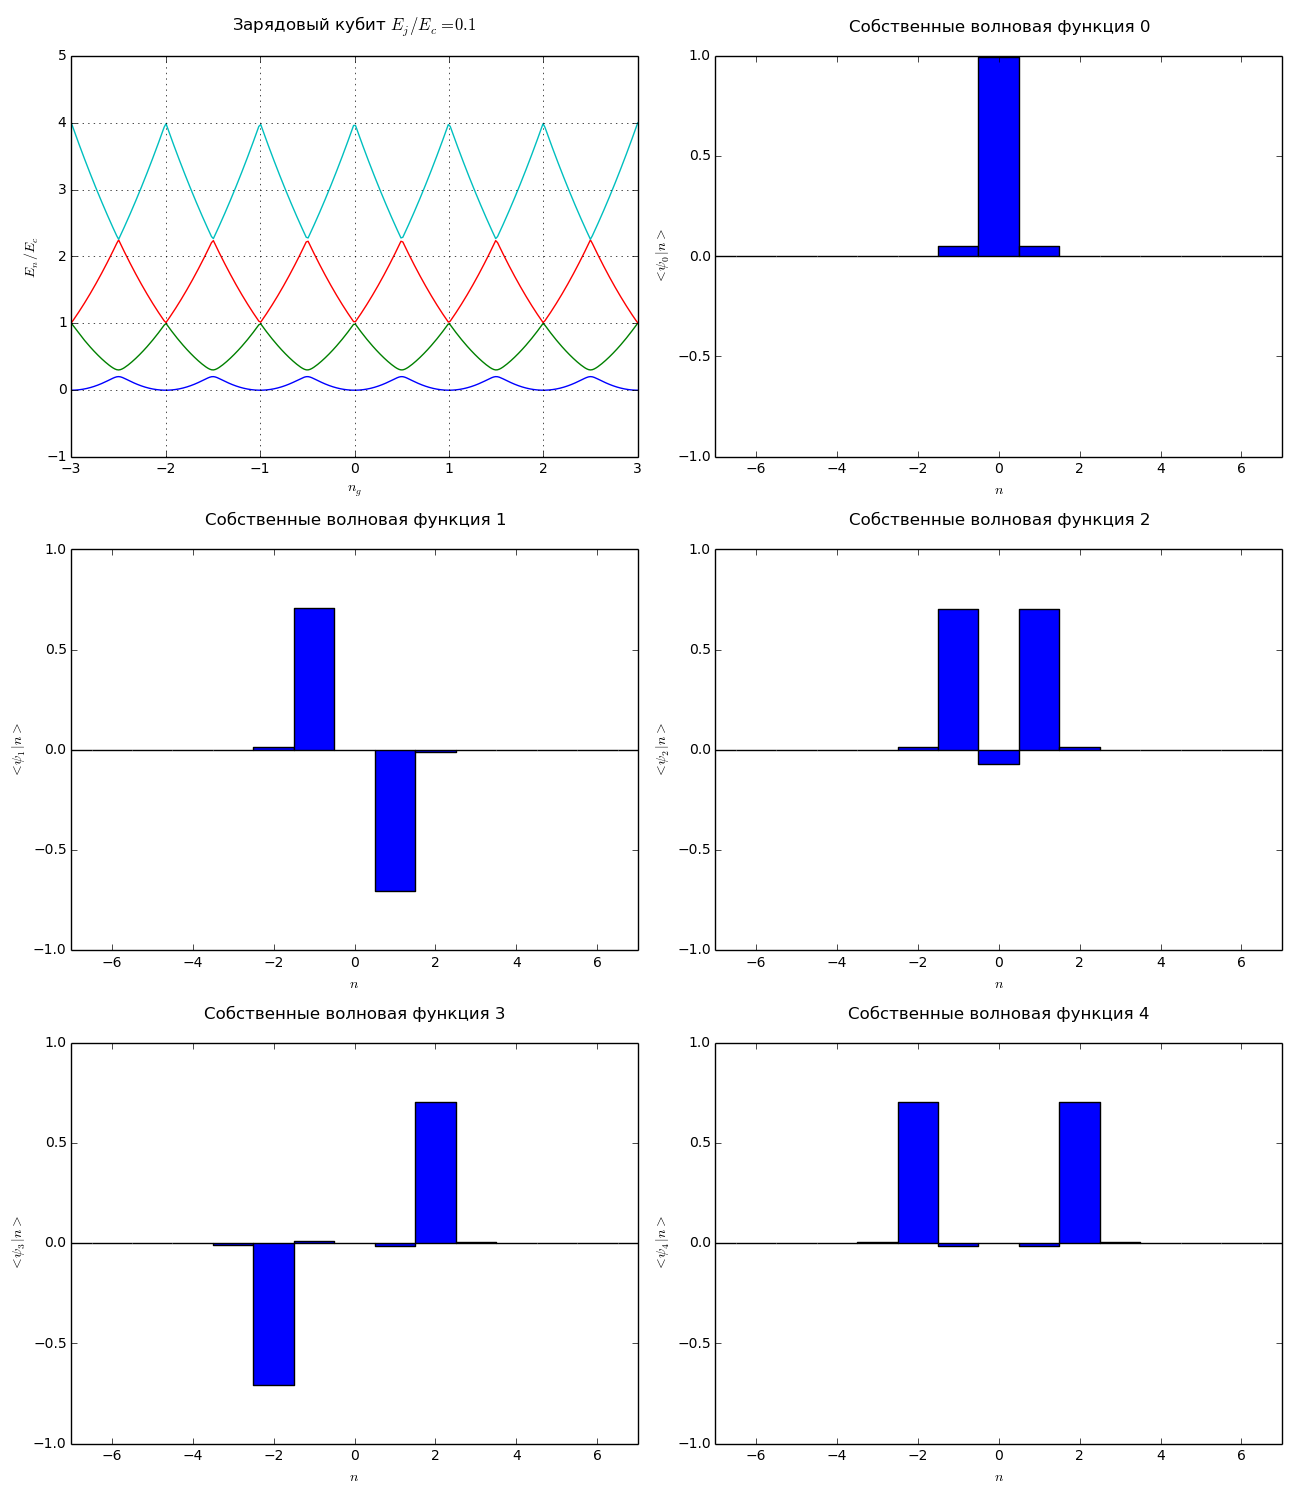

In [57]:
m = 2
num_of_funcs = 2*m + 1
fig = plt.figure(figsize=(13,5*(m+1)),dpi=300)
charge = fig.add_subplot(m+1,2,1)
charge.set_title(r'Зарядовый кубит $E_j/E_c = 0.1$'+'\n')
charge.set_xlabel(r'$n_g$')
charge.set_ylabel(r'$E_n/E_c$')
charge.plot(ng_space,eigs[:,0:4]/Ec)
charge.grid()
func = [0 for x in range(0,num_of_funcs)]
for j in range(0,num_of_funcs):
    func[j] = fig.add_subplot(m+1,2,2+j)
    func[j].set_title(r'Собственные волновая функция '+str(j)+'\n')
    func[j].set_xlabel(r'$n$')
    func[j].set_ylabel(r'$<\psi_'+str(j)+'|n>$')
    
    w = [np.real(x[0][0]) for x in (waves[j])]
    #print(w[N_states-2:N_states+9])
    #func[j].bar(tuple([z for z in range(-2,8+1)]),tuple(w[N_states-2:N_states+9]),1)
    func[j].bar([z for z in range(-N_states, N_states+1)], w,1, align= 'center')
    func[j].set_ylim([-1,1])
    func[j].set_xlim([-7,7])
fig.tight_layout()
fig.show()
    #funcs.legend(bbox_to_anchor = [0,1], loc = "upper left")

In [61]:
n = num(N_states)
ng = 0
Hc = Ec*(n-ng)**2

eigs = np.zeros((ng_steps,N_states), dtype=np.float64)
ng_space = np.linspace(-3,3,ng_steps)
Hj = zero_oper(N_states)
for n in range(0,N_states):
    Hj = Hj - 0.5*Ej*(projector(N_states,n,n+1) + projector(N_states,n+1,n))
H = Hj + Hc
print(Hj)
print(Hc)
n = num(N_states)
for ng_id, ng in enumerate(ng_space):
    Hc = Ec*(n-ng)**2
    H = Hc + Hj
    eigs[ng_id,:] = H.eigenenergies()

waves = H.eigenstates()[1]

Quantum object: dims = [[200], [200]], shape = [200, 200], type = oper, isherm = True
Qobj data =
[[       0. -5000000.        0. ...,        0.        0.        0.]
 [-5000000.        0. -5000000. ...,        0.        0.        0.]
 [       0. -5000000.        0. ...,        0.        0.        0.]
 ..., 
 [       0.        0.        0. ...,        0. -5000000.        0.]
 [       0.        0.        0. ..., -5000000.        0. -5000000.]
 [       0.        0.        0. ...,        0. -5000000.        0.]]
Quantum object: dims = [[200], [200]], shape = [200, 200], type = oper, isherm = True
Qobj data =
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+08   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   4.00000000e+08 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000

In [59]:
Ec = 1e8
Ej = 1e7
N_states = 200
n = num(N_states)
ng = 0
Hc = Ec*(n-ng)**2
ng_steps = 300

#

def projector(N,n,m):
    # |m><n| operator
    a = np.zeros((N,N),dtype = np.float64)
    if(n >= N or n < 0 or m >= N or m < 0):
        return Qobj(a)
    a[n,m] = 1
    return Qobj(a)

#



eigs = np.zeros((ng_steps,N_states), dtype=np.float64)
ng_space = np.linspace(-3,3,ng_steps)
Hj = Qobj(projector(N_states,-1,-1))
for n in range(0,N_states):
    Hj = Hj - 0.5*Ej*(projector(N_states,n,n+1) + projector(N_states,n+1,n))
H = Hj + Hc
print(Hj)
print(Hc)
n = num(N_states)
for ng_id, ng in enumerate(ng_space):
    Hc = Ec*(n-ng)**2
    H = Hc + Hj
    eigs[ng_id,:] = H.eigenenergies()

waves = H.eigenstates()[1]

Quantum object: dims = [[200], [200]], shape = [200, 200], type = oper, isherm = True
Qobj data =
[[       0. -5000000.        0. ...,        0.        0.        0.]
 [-5000000.        0. -5000000. ...,        0.        0.        0.]
 [       0. -5000000.        0. ...,        0.        0.        0.]
 ..., 
 [       0.        0.        0. ...,        0. -5000000.        0.]
 [       0.        0.        0. ..., -5000000.        0. -5000000.]
 [       0.        0.        0. ...,        0. -5000000.        0.]]
Quantum object: dims = [[200], [200]], shape = [200, 200], type = oper, isherm = True
Qobj data =
[[  0.00000000e+00   0.00000000e+00   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   1.00000000e+08   0.00000000e+00 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 [  0.00000000e+00   0.00000000e+00   4.00000000e+08 ...,   0.00000000e+00
    0.00000000e+00   0.00000000e+00]
 ..., 
 [  0.00000000e+00   0.00000000e+00   0.00000

/usr/lib/python3/dist-packages/matplotlib/figure.py:372: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


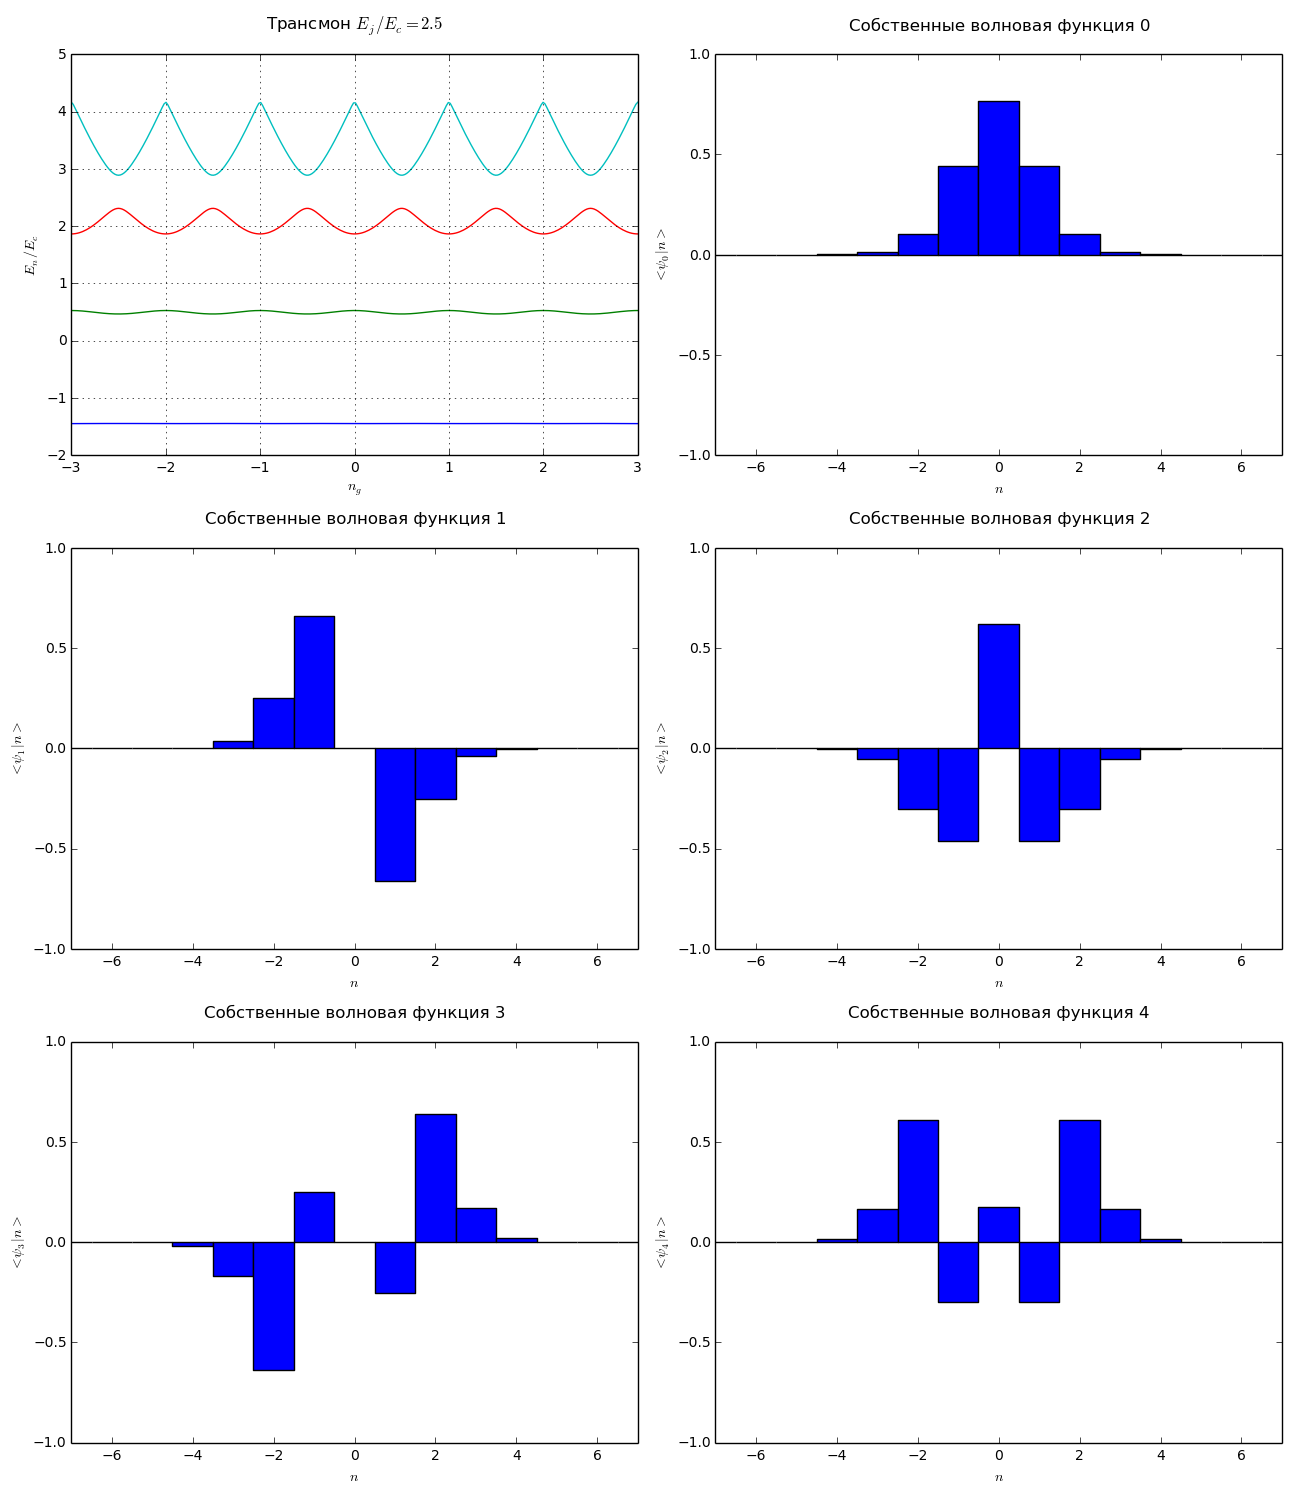

In [55]:
m = 2
num_of_funcs = 2*m + 1
fig = plt.figure(figsize=(13,5*(m+1)),dpi=300)
charge = fig.add_subplot(m+1,2,1)
charge.set_title(r'Трансмон $E_j/E_c = 2.5$'+'\n')
charge.set_xlabel(r'$n_g$')
charge.set_ylabel(r'$E_n/E_c$')
charge.plot(ng_space,eigs[:,0:4]/Ec)
charge.grid()
func = [0 for x in range(0,num_of_funcs)]
for j in range(0,num_of_funcs):
    func[j] = fig.add_subplot(m+1,2,2+j)
    func[j].set_title(r'Собственные волновая функция '+str(j)+'\n')
    func[j].set_xlabel(r'$n$')
    func[j].set_ylabel(r'$<\psi_'+str(j)+'|n>$')
    
    w = [np.real(x[0][0]) for x in (waves[j])]
    #print(w[N_states-2:N_states+9])
    func[j].bar([z for z in range(-N_states, N_states+1)], w,1, align= 'center')
    func[j].set_ylim([-1,1])
    func[j].set_xlim([-7,7])
    #funcs.legend(bbox_to_anchor = [0,1], loc = "upper left")
fig.tight_layout()
fig.show()

list